In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import glob

In [16]:
flist = glob.glob('quantification/*.csv')

concs = [125000, 1000, 200, 25000, 40, 500000, 500000, 500000, 500000,500000, 5000, 625000, 8, 0]
times = [180, 180, 180, 180, 180, 10, 120, 180, 30, 60, 180, 180, 180, 0]

df=pd.DataFrame()
sample_list =[]
for i,file in enumerate(flist):
    df_tmp = pd.read_csv(file, index_col=0).drop('Slice',axis=1)
    df_tmp['sample'] = file[15:-4]
    df_tmp['concentration'] = concs[i]
    df_tmp['time'] = times[i]
    df = pd.concat([df,df_tmp])
    sample_list.append(file[15:-4])
df = df.reset_index(drop=True)
df['label'] = np.full(len(df),1)
display(df)
print(sample_list)

Mean          sample  concentration  time  label
0    1187.830  125uM-180min-1         125000   180      1
1    1141.036  125uM-180min-1         125000   180      1
2    1144.027  125uM-180min-1         125000   180      1
3    1116.973  125uM-180min-1         125000   180      1
4    1080.741  125uM-180min-1         125000   180      1
..        ...             ...            ...   ...    ...
695    38.214          DMSO-1              0     0      1
696    58.696          DMSO-1              0     0      1
697    44.679          DMSO-1              0     0      1
698    67.089          DMSO-1              0     0      1
699    28.902          DMSO-1              0     0      1

[700 rows x 5 columns]

['125uM-180min-1', '1uM-180min-1', '200nM-180min-1', '25uM-180min-1', '40nM-180min-1', '500uM-10min-9', '500uM-120min-1', '500uM-180min-1', '500uM-30min-1', '500uM-60min-2', '5uM-180min-1', '625uM-180min-1', '8nM-180min-1', 'DMSO-1']


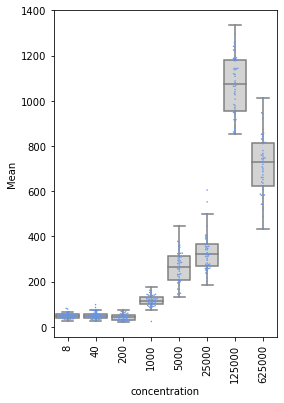

In [23]:
plt.figure(facecolor = 'w',figsize=(4,6))
plt.rcParams['pdf.fonttype'] = 42
sns.boxplot(data=df[(df['time']==180)&(df['concentration']!=500000)], 
            x='concentration', y='Mean', color ='lightgrey',fliersize=0)
sns.swarmplot(x="concentration", y="Mean", data=df[(df['time']==180)&(df['concentration']!=500000)]
              , color="cornflowerblue", size=1.5)
plt.xticks(rotation =90)

plt.savefig('dose_titration.pdf')

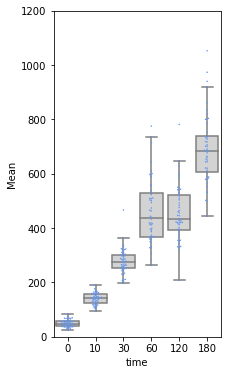

In [24]:
plt.figure(facecolor = 'w',figsize=(3,6))
plt.rcParams['pdf.fonttype'] = 42
sns.boxplot(data=df[(df['concentration']==500000)|(df['concentration']==0)], 
            x='time', y='Mean', color ='lightgrey',fliersize=0)
sns.swarmplot(x="time", y="Mean", data=df[(df['concentration']==500000)|(df['concentration']==0)], 
              color="cornflowerblue", size=1.5)
plt.ylim(0,1200)
plt.savefig('time.pdf')

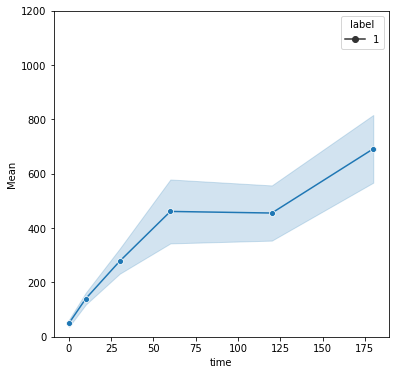

In [29]:
plt.figure(facecolor = 'w',figsize=(6,6))
sns.lineplot(data=df[(df['concentration']==500000)|(df['concentration']==0)], 
             x='time', y='Mean', style="label",ci='sd', markers=True, dashes=False)
plt.ylim(0,1200)
plt.savefig('time_scale.pdf')

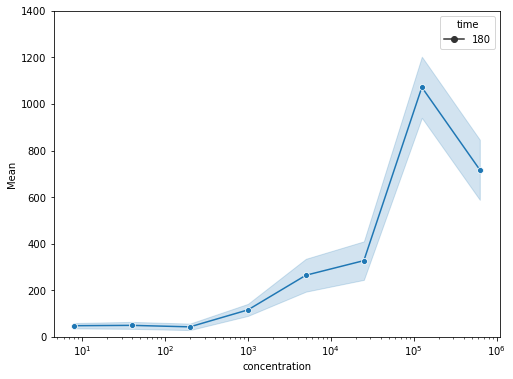

In [30]:
plt.figure(facecolor = 'w',figsize=(8,6))
plt.rcParams['pdf.fonttype'] = 42
sns.lineplot(data=df[(df['time']==180)&(df['concentration']!=500000)], 
             x='concentration', y='Mean',ci='sd', style='time',markers=True)
plt.xscale('log')
plt.ylim(0,1400)
plt.savefig('dose_titration_scale.pdf')